## Student Performance Dataset

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Importing Data and packages

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('data/stud.csv')
nd = df.iloc[:,:].values
print(df.head())
print(nd[0:5,:])
print('\n Data Frame Shape: \n',df.shape)

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
[['female' 'group B' "bachelor's degree" 'standard' 'none' 72 72 74]
 ['female' 'group C' 'some college' 'standard' 'completed' 69 90 88]
 ['female' 'group B' 

### 3. Data Checks

### 3.1 Checking missing values

In [24]:
df.isna().sum()
# pd.isna(nd/df).sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Checking duplicated values

In [25]:
df.duplicated().sum()

0

### 3.3 Checking Data types of each column

In [26]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [27]:
df.info()
for i in range(len(df.iloc[0,:])):
    print(df.columns[i], df.iloc[0,i], type(df.iloc[0,i]))
# print(df.loc[0,:])
# print(df.iloc[0,:])
# df.columns[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
gender female <class 'str'>
race_ethnicity group B <class 'str'>
parental_level_of_education bachelor's degree <class 'str'>
lunch standard <class 'str'>
test_preparation_course none <class 'str'>
math_score 72 <class 'numpy.int64'>
reading_score 72 <class 'numpy.int64'>
wr

### 3.4 Checking unique values in each column

In [28]:
# print(df.columns)
# pd.unique(df['gender'])

In [29]:
print(df.nunique())
for i in df.columns:
    print(df[i].unique(), df[i].value_counts())
for i in range(nd.shape[1]):
    print(np.unique(nd[:,i], return_counts = 1))
# np.unique(df.iloc[:,0], return_counts = 1)

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64
['female' 'male'] gender
female    518
male      482
Name: count, dtype: int64
['group B' 'group C' 'group A' 'group D' 'group E'] race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
['standard' 'free/reduced'] lunch
standard        645
free/reduced    355
Name: count, dtype: int64
['none' 'completed'] test_preparation_course
non

### 3.4 Check statistics of dataset

In [30]:
df.describe()
# np.quantile()
# help(np)

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
# df['']

In [32]:
# defining numerical and categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Numerical Features:\n', num_features)
print('Categorical features:\n', cat_features)

Numerical Features:
 ['math_score', 'reading_score', 'writing_score']
Categorical features:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Binning
### Adding columns for "Total Score" and "Average"

In [33]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score'] / 3
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total Score    Average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          2

In [34]:
# nd[nd[:,6] == 100, :]
# (nd[:,6] == 100).sum()
# (df['reading_score'] == 100).sum()

# np.unique(nd[:,0], return_counts = 1)
# df[df['reading_score'] == 100]['Average'].count()

In [35]:
print('Reading Score :',(df['reading_score'] == 100).sum())
print('writing_score :',(df['writing_score'] == 100).sum())
print('math_score :',(df['math_score'] == 100).sum())

Reading Score : 17
writing_score : 14
math_score : 7


In [36]:
print('Reading Score :',(df['reading_score'] <= 20).sum())
print('writing_score :',(df['writing_score'] <= 20).sum())
print('math_score :',(df['math_score'] <= 20).sum())

Reading Score : 1
writing_score : 3
math_score : 4


### Exploring Data (Visualization)

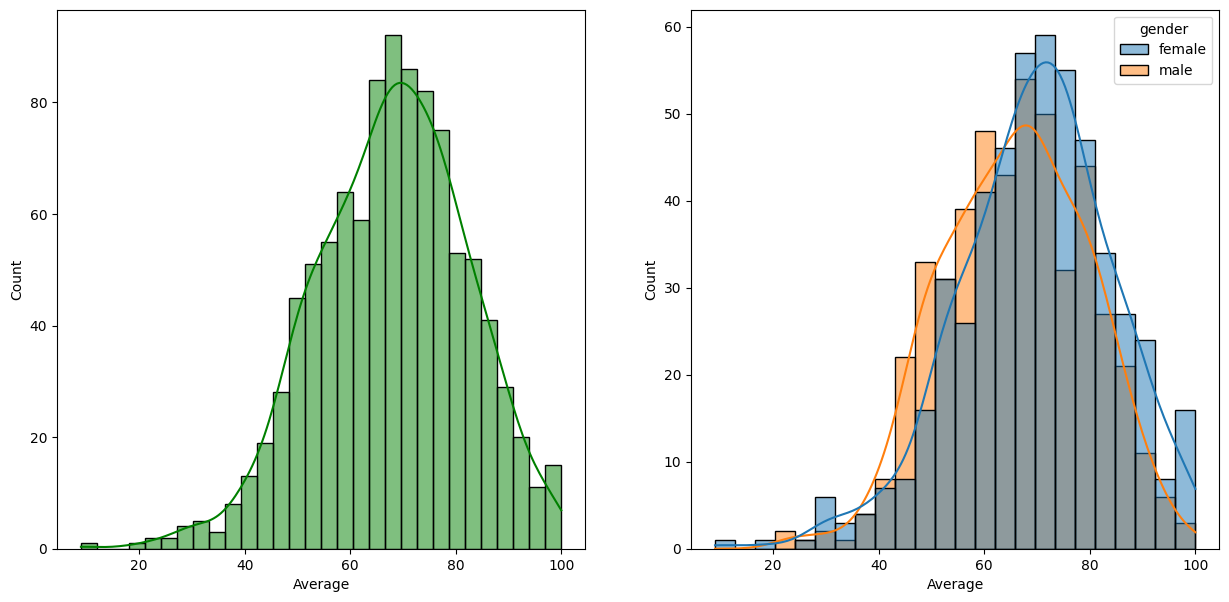

In [37]:
_, axes = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(data = df, x = 'Average', ax = axes[0], bins = 30, kde = True,color = 'g')
# plt.show()
sns.histplot(data = df, x = 'Average', ax = axes[1], kde = True, hue = 'gender', color = 'r')
plt.show()
# sns.h
# sns.boxplot(df['reading_score'])
# plt.show()
# sns.boxplot(df['writing_score'])
# plt.show()
# plt.boxplot(nd[:,6])
# plt.ylabel('read')
# plt.show()

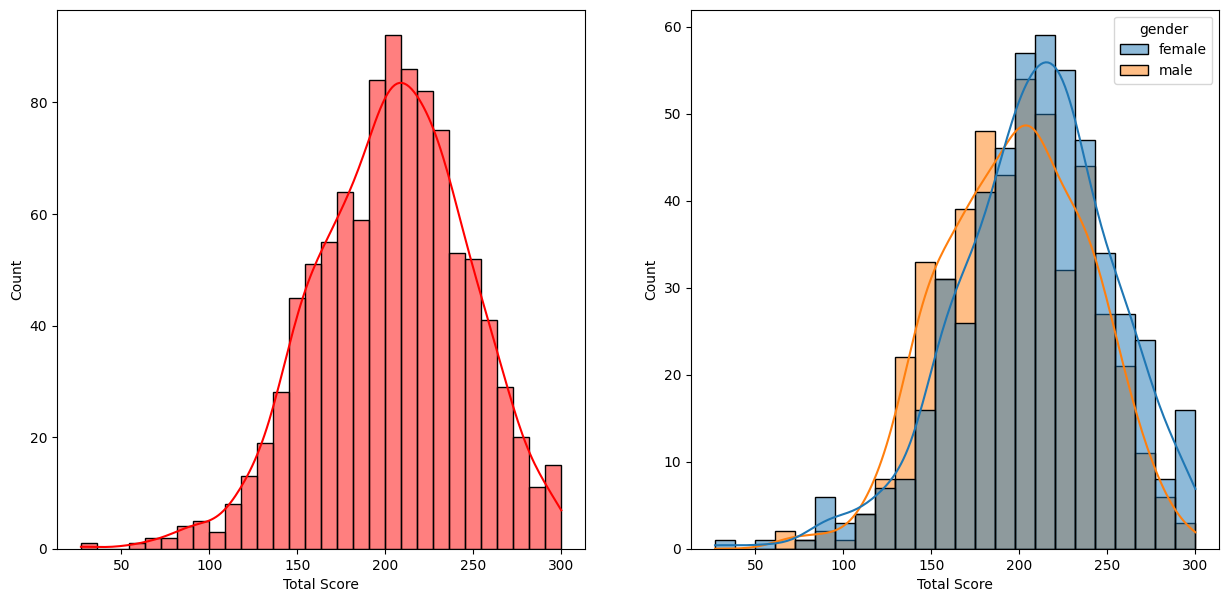

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
sns.histplot(x = df['Total Score'], bins = 30, ax = axes[0],  kde = True, color = 'r')
sns.histplot(x = df['Total Score'], ax = axes[1], kde = True, hue = df['gender'] )
plt.show()

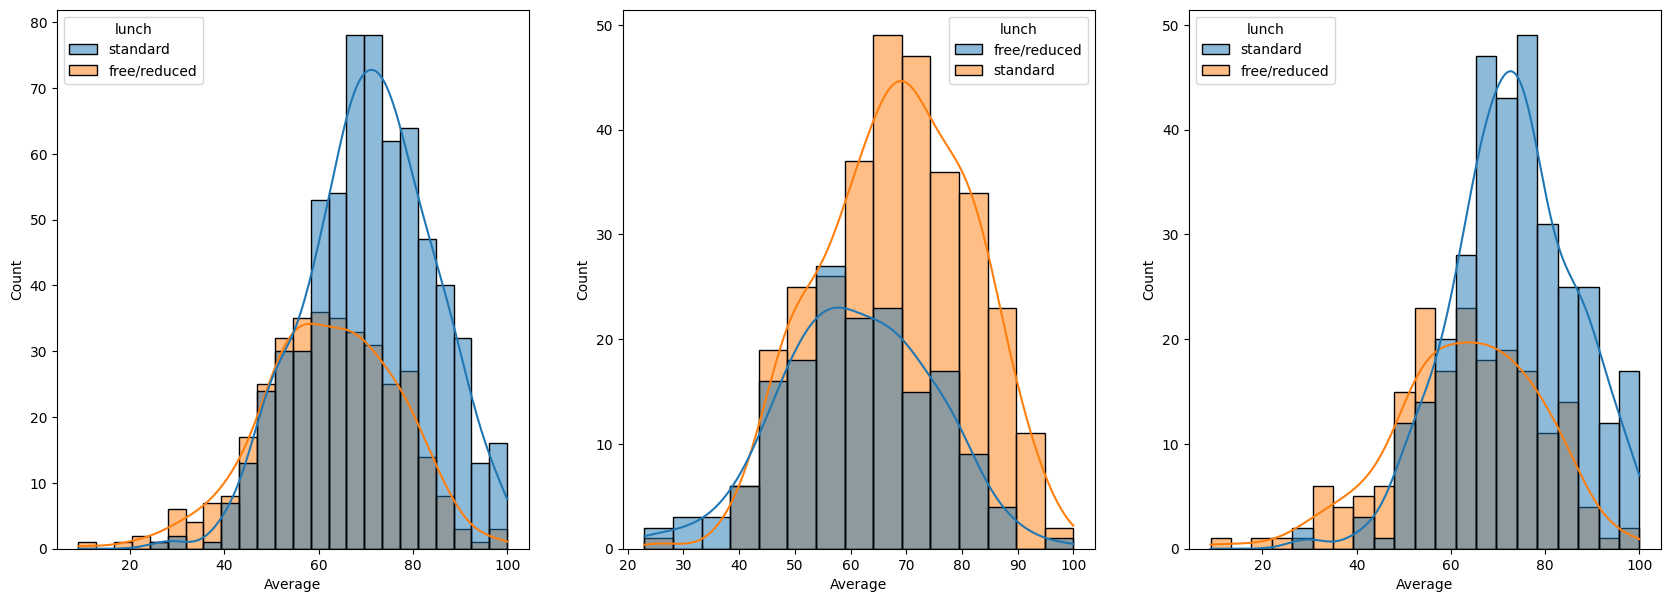

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 7))
plt.subplot(1, 4, 1)
sns.histplot(x = df['Average'], kde = True, hue = df['lunch'])
plt.subplot(1, 4, 2)
sns.histplot(data = df[df['gender'] == 'male'], x = 'Average', kde = 1, hue = 'lunch')
plt.subplot(1, 4, 3)
sns.histplot(data = df[df['gender'] == 'female'], x = 'Average', kde = 1, hue = 'lunch')
plt.show()

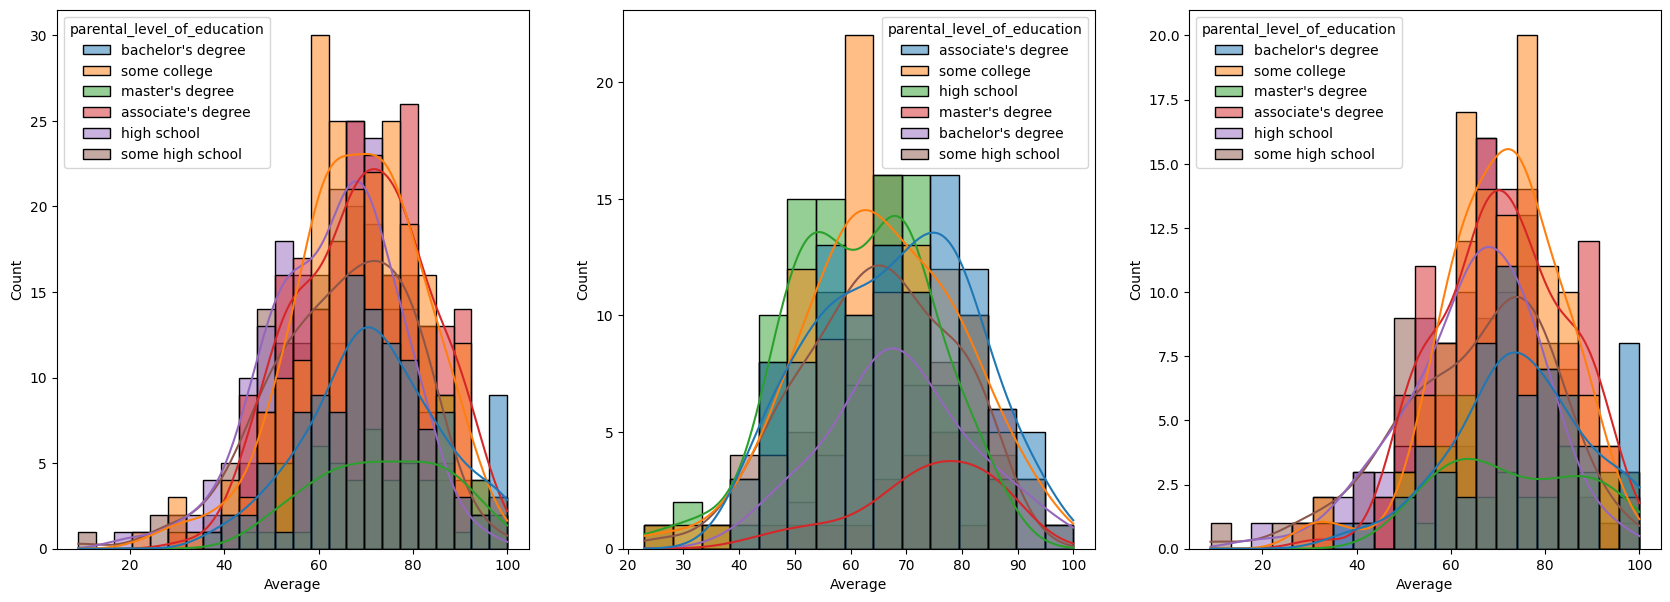

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 7))
plt.subplot(1, 4, 1)
sns.histplot(data = df, x = 'Average', kde = 1, hue = 'parental_level_of_education')
plt.subplot(1, 4, 2)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = 1, hue = 'parental_level_of_education')
plt.subplot(1, 4, 3)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = 1, hue = 'parental_level_of_education')
plt.show()

#### Maximum score of students in all three subjects

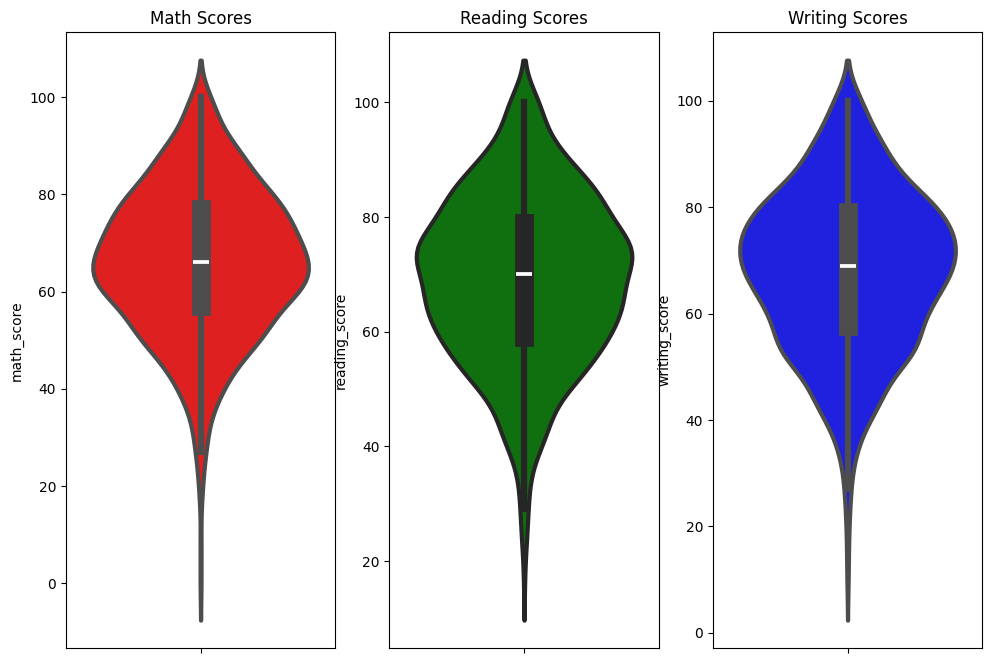

In [41]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth = 3)
plt.show()

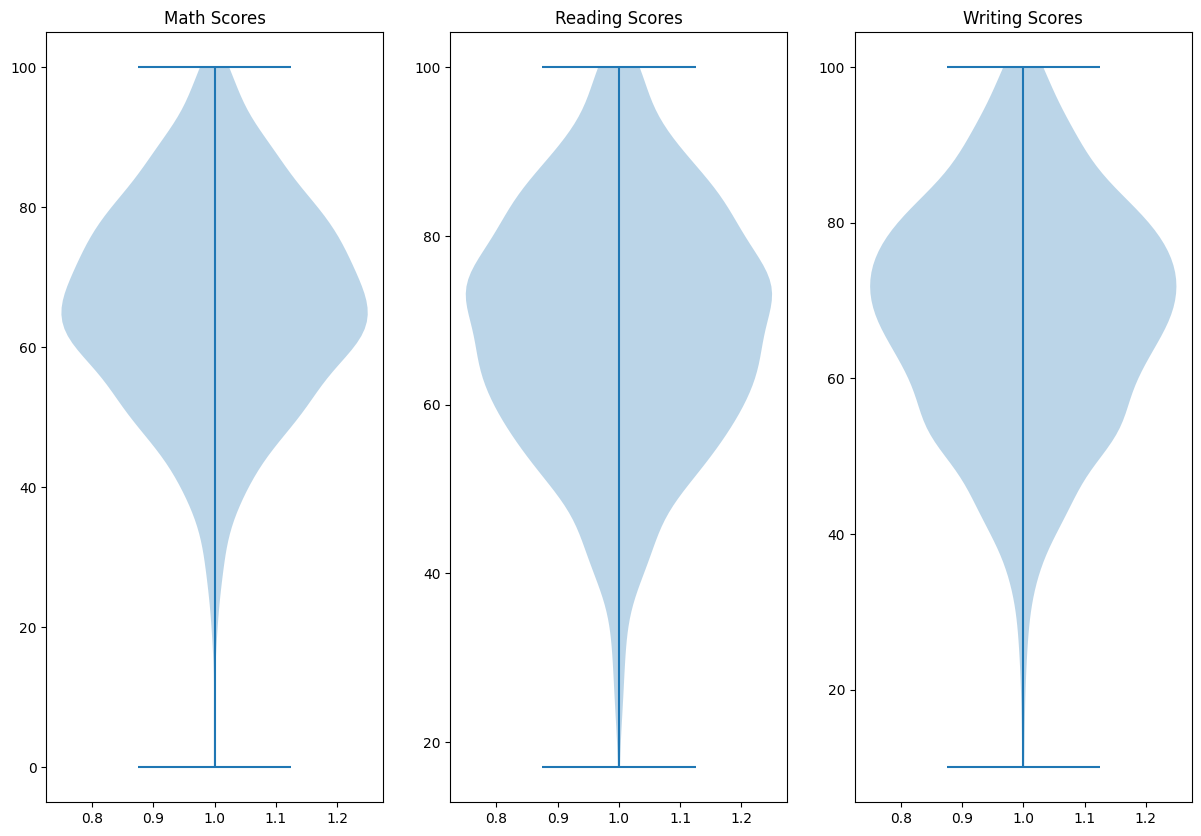

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
plt.violinplot(dataset = df['math_score'])
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
plt.violinplot(dataset = df['reading_score'])
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
plt.violinplot(dataset = df['writing_score'])
plt.show()

#### Multivariate Analysis

(-1.25, 1.25, -1.25, 1.25)

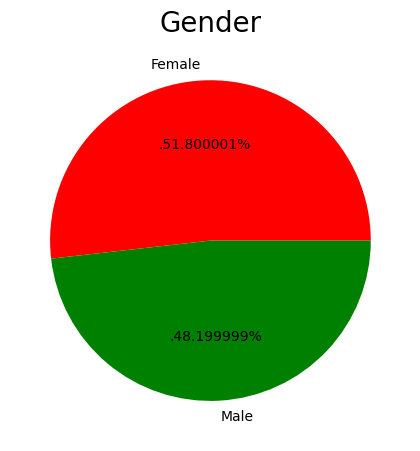

In [43]:
plt.rcParams['figure.figsize'] = (30,10)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']



plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize =20)
plt.axis('off')

In [44]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [45]:
# df['race_ethnicity'].value_counts()
for i in np.unique(df['race_ethnicity']):
    print(i)

group A
group B
group C
group D
group E


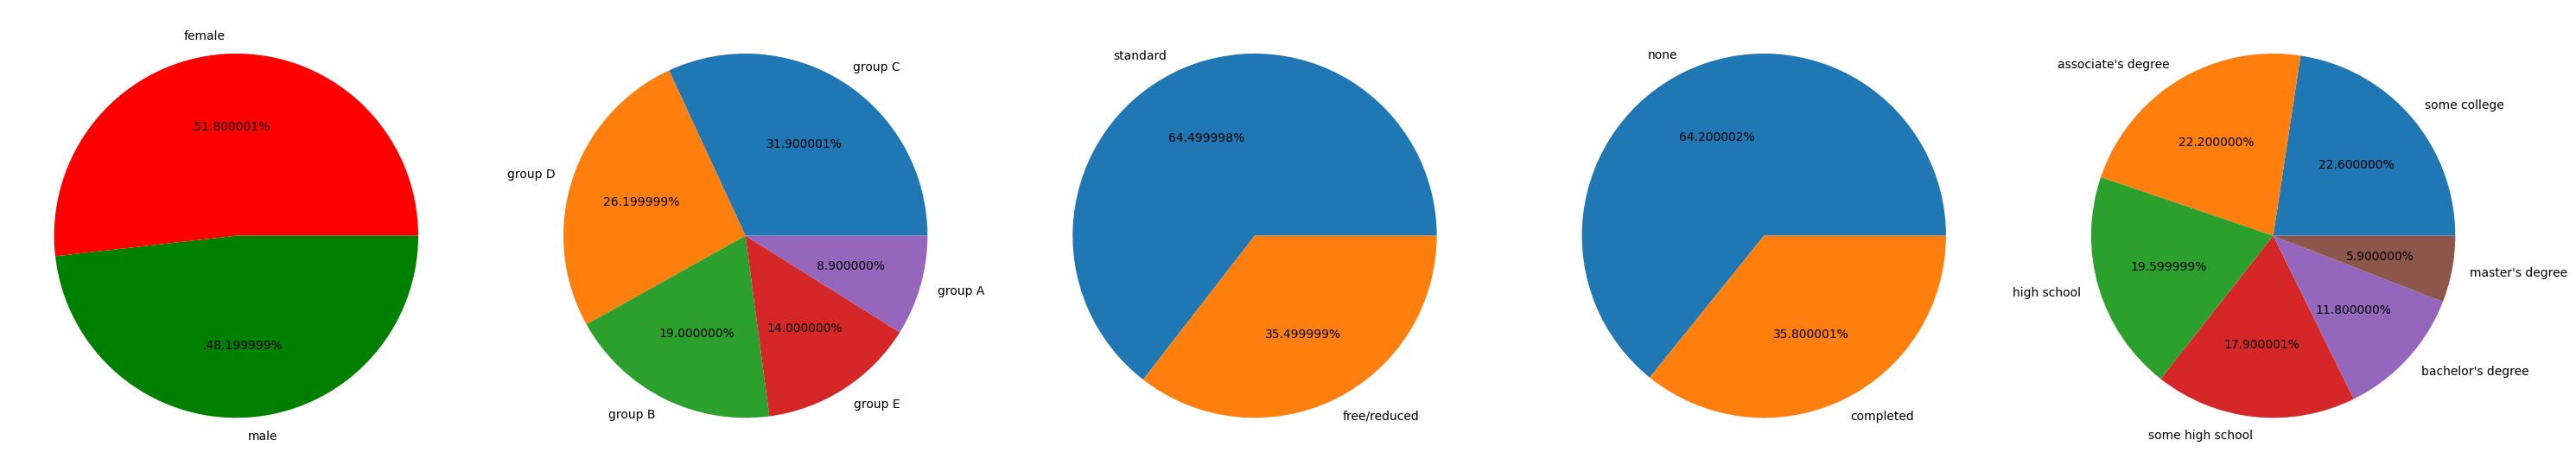

In [46]:
## need to change the labels they are incorrect
plt.subplot(1, 5, 1)
plt.pie(x = df['gender'].value_counts(),  labels = df['gender'].value_counts().index, colors = ['red', 'green'], autopct = '.%2f%%')
# plt.show()
plt.subplot(1, 5, 2)
plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, autopct = '%2f%%')
plt.subplot(1, 5, 3)
plt.pie(x = df['lunch'].value_counts(), labels = df['lunch'].value_counts().index, autopct = '%2f%%')
plt.subplot(1, 5, 4)
plt.pie(x = df['test_preparation_course'].value_counts(), labels = df['test_preparation_course'].value_counts().index, autopct = '%2f%%')
plt.subplot(1, 5, 5)
plt.pie(x = df['parental_level_of_education'].value_counts(), labels = df['parental_level_of_education'].value_counts().index, autopct = '%2f%%')
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

In [48]:
# print(np.unique(df['gender'], return_counts= 1))
# print(np.unique(df['race_ethnicity'], return_counts= 1))
# print(np.unique(df['lunch'], return_counts= 1))
# print(np.unique(df['test_preparation_course'], return_counts= 1))
# print(np.unique(df['parental_level_of_education'], return_counts= 1))
# print()
# a = np.concatenate((np.unique(df['gender'], return_counts= 1)[0].reshape(-1,1),np.unique(df['gender'], return_counts= 1)[1].reshape(-1,1)), 1)
# np.merg


#### 4.4 Feature Wise Visualization

#### Univariate Analysis

Palette = 'flare', 'mako', 'coolwarm', 'Blues_r', 'winter_r', 'autumn', 'husl', 'RdBu', 'spring', 'bright'

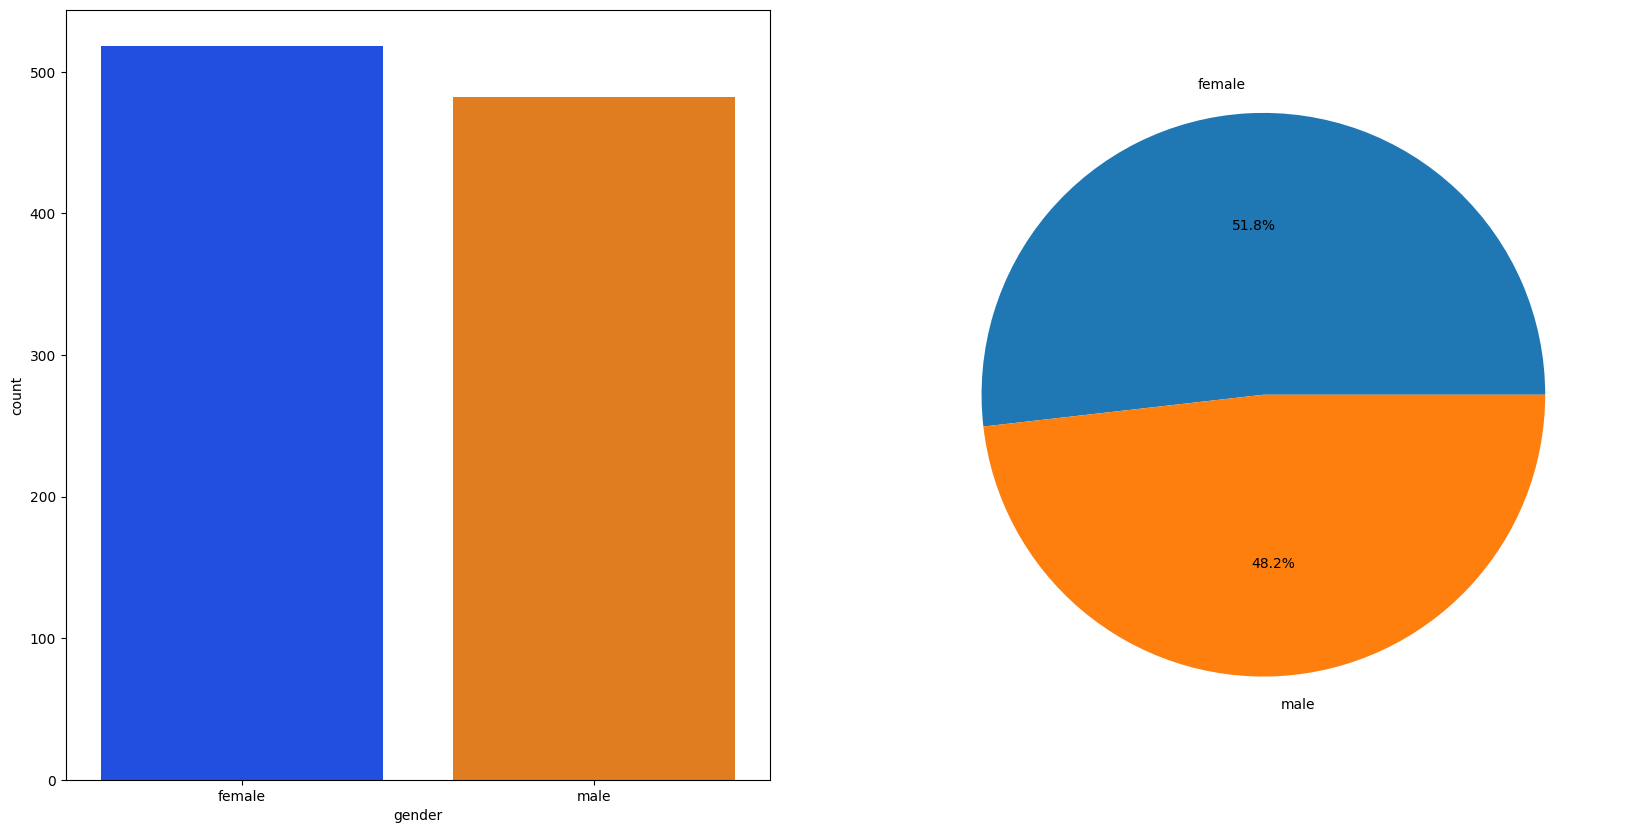

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = df['gender'], data = df, palette = 'bright')
plt.subplot(1,2,2)
plt.pie(x = df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%1.1f%%')
plt.show()

#### Bivariate Analysis
Does Gender has any impact on student's performance

Race_Ethnicity column

Univariate Analysis

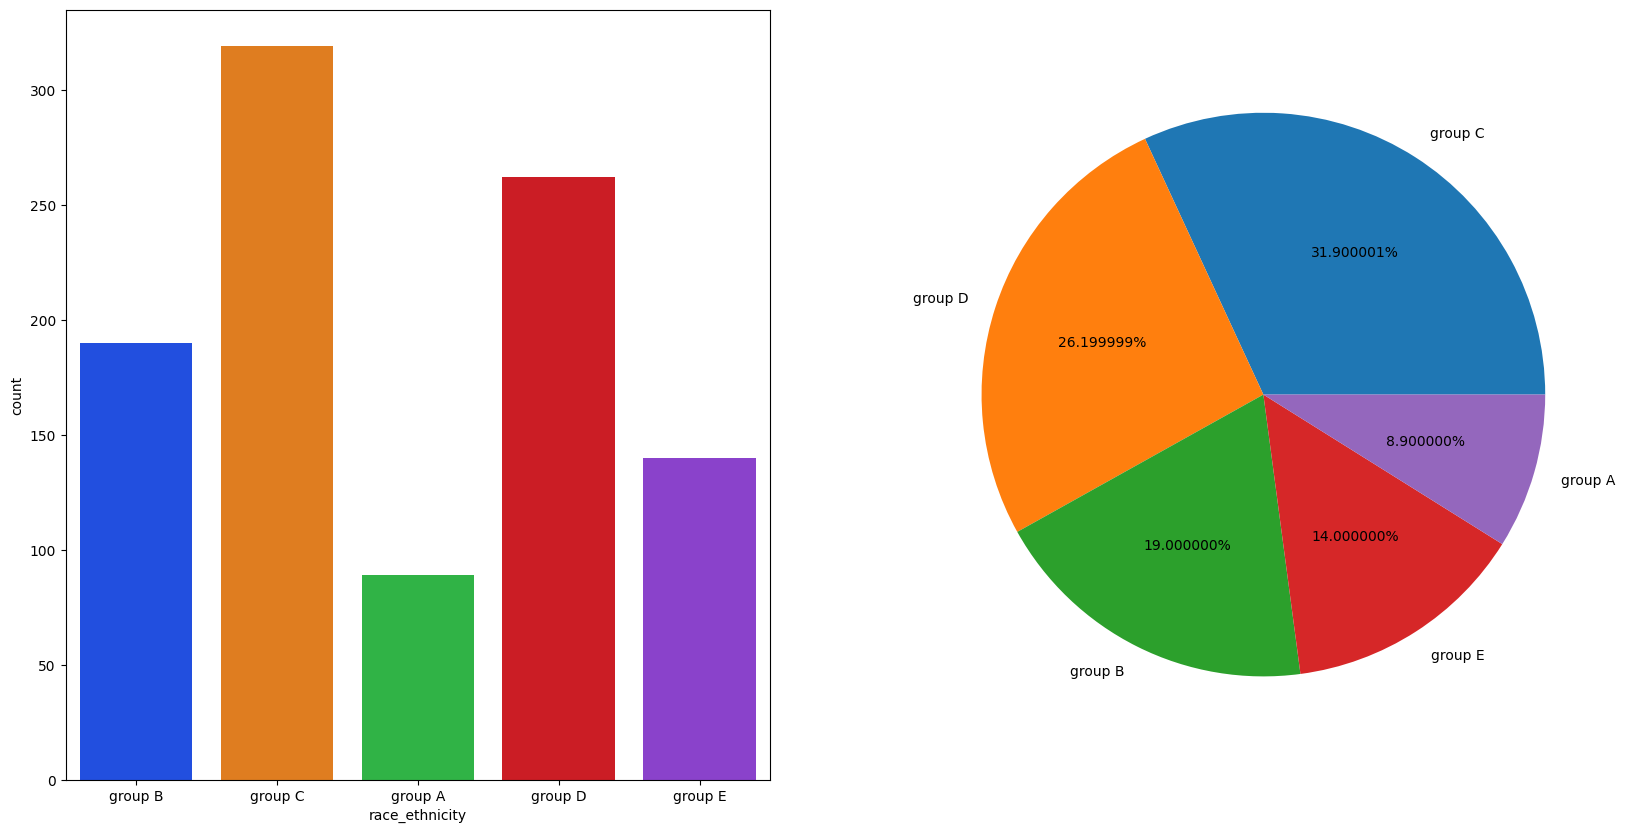

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))
plt.subplot(1,2,1)
sns.countplot(x = 'race_ethnicity', data = df, palette = 'bright')
plt.subplot(1,2,2)
plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, autopct = '%2f%%')
plt.show()

Bivariate Analysis: 
race_ethnicity's impact on Student's performance

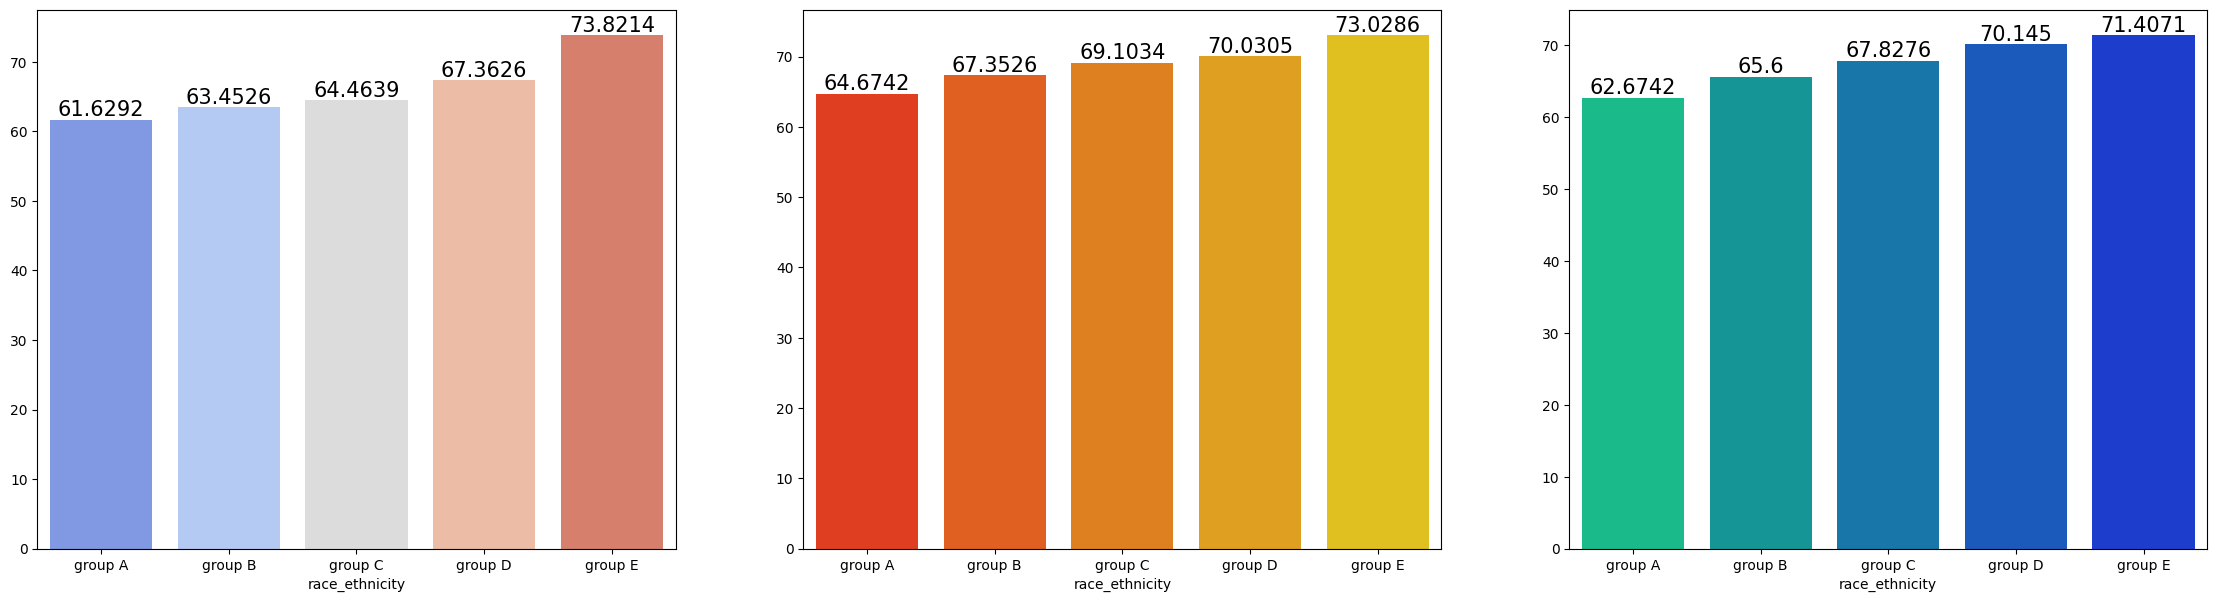

In [51]:
grp = df.groupby('race_ethnicity')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 7))

# plt.subplot(1, 4, 1)
sns.barplot(x = grp['math_score'].mean().index, y = grp['math_score'].mean().values, palette = 'coolwarm', ax = axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container, color = 'black', size = 15)

# plt.subplot(1, 4, 2)
sns.barplot(x = grp['reading_score'].mean().index, y = grp['reading_score'].mean().values, palette = 'autumn', ax = axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x = grp['writing_score'].mean().index, y = grp['writing_score'].mean().values, palette = 'winter_r', ax = axes[2])
for container in axes[2].containers:
    axes[2].bar_label(container, color = 'black', size = 15)



Parental Level of Education

Univariate Analysis

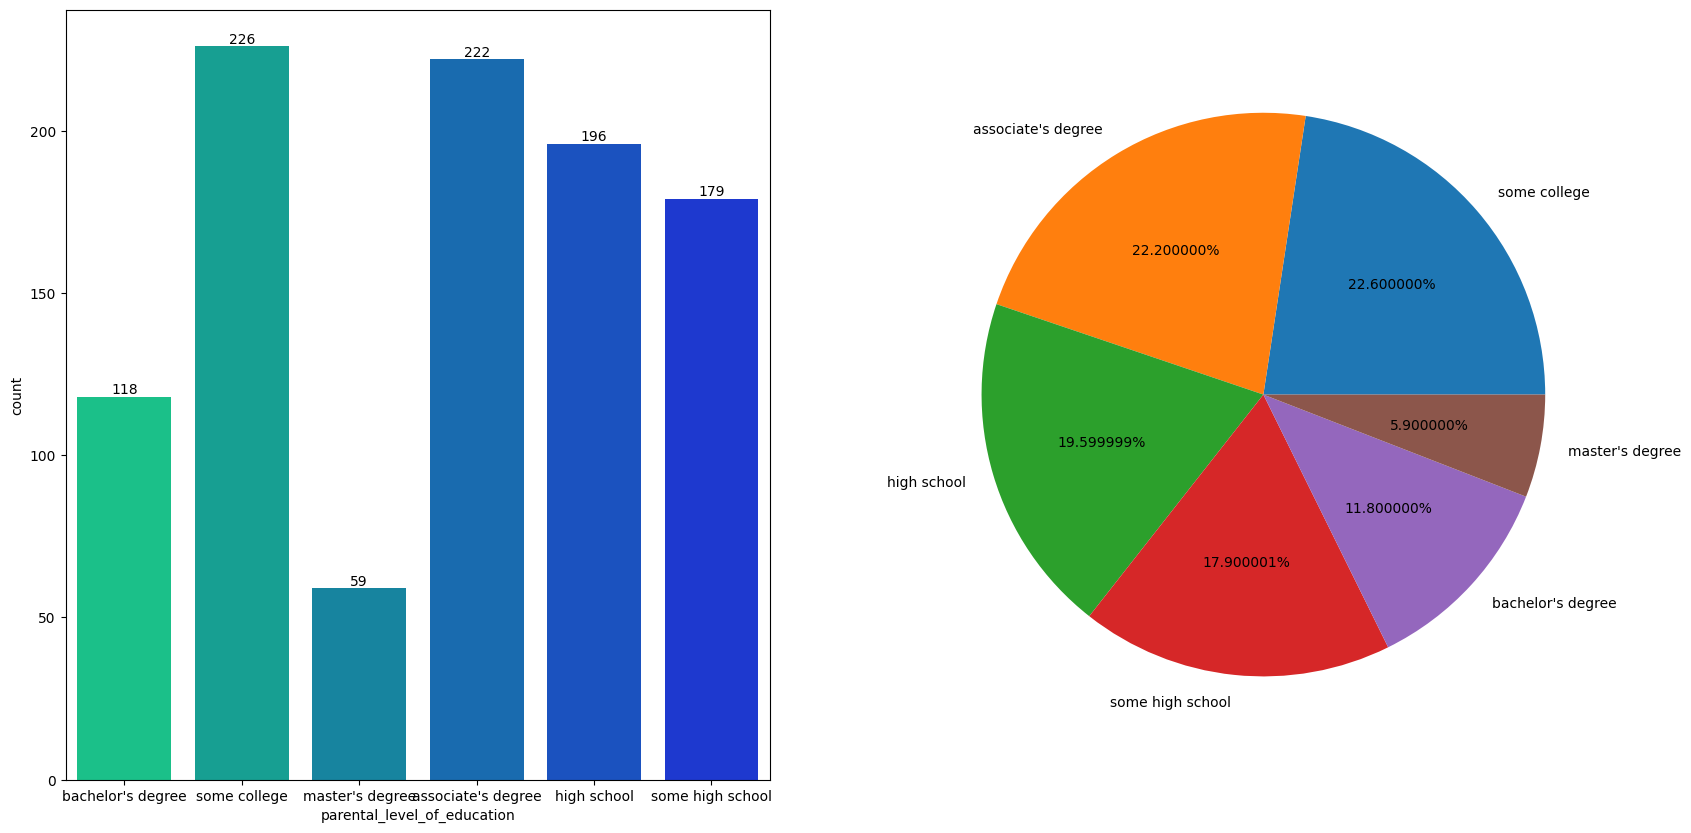

In [52]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

sns.countplot(x = df['parental_level_of_education'], ax = axes[0], palette = 'winter_r')
for container in axes[0].containers:
    axes[0].bar_label(container)
plt.subplot(1, 2, 2)
plt.pie(x = df['parental_level_of_education'].value_counts(), labels = df['parental_level_of_education'].value_counts().index, autopct = '%2f%%')
plt.show()

Bivariate Analysis

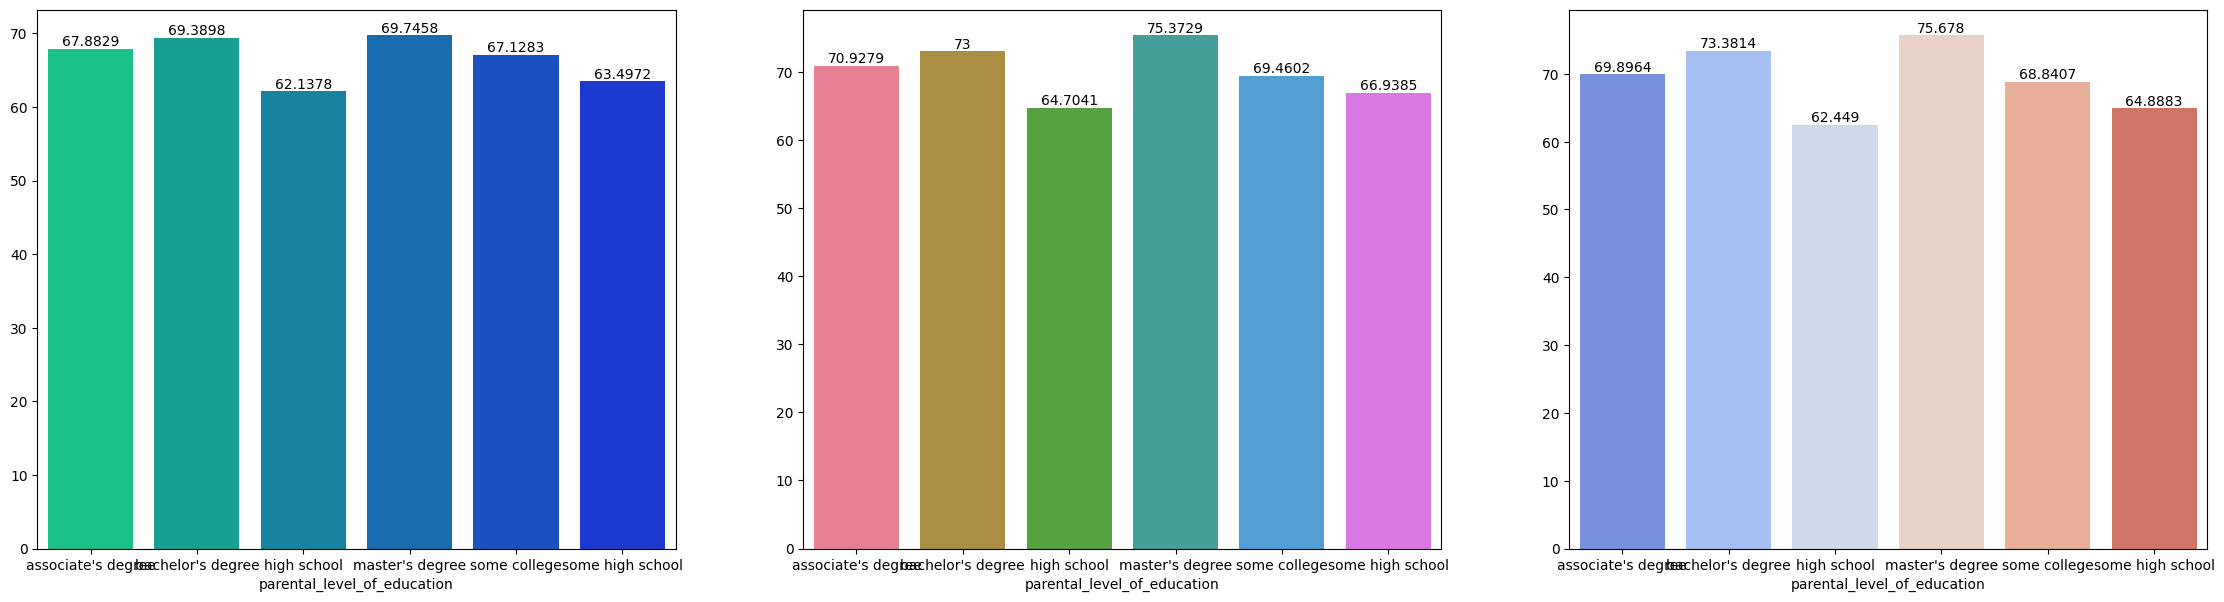

In [53]:
grp = df.groupby('parental_level_of_education')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (28,7))

sns.barplot(x = grp['math_score'].mean().index, y = grp['math_score'].mean().values, ax = axes[0], palette = 'winter_r')
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.barplot(x = grp['reading_score'].mean().index, y = grp['reading_score'].mean().values, ax = axes[1], palette = 'husl')
for container in axes[1].containers:
    axes[1].bar_label(container)

sns.barplot(x = grp['writing_score'].mean().index, y = grp['writing_score'].mean().values, ax = axes[2], palette = 'coolwarm')
for container in axes[2].containers:
    axes[2].bar_label(container)

plt.show()


Lunch column

Univariate Analysis

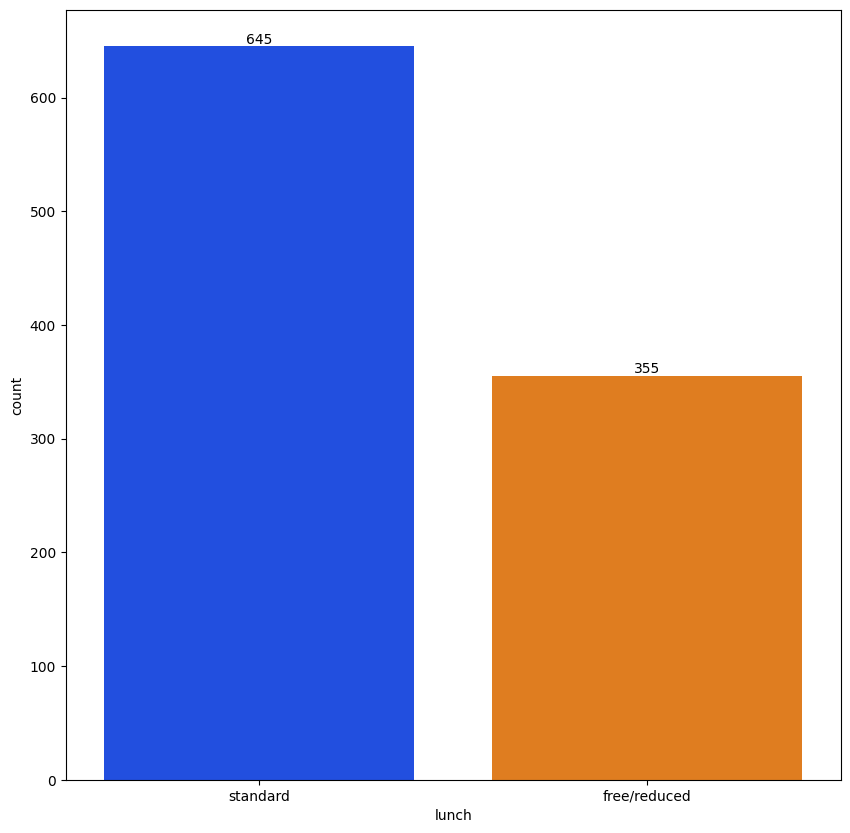

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
sns.countplot(x = df['lunch'], palette = 'bright', ax = axes)
for container in axes.containers:
    axes.bar_label(container)

Bivariate Analysis

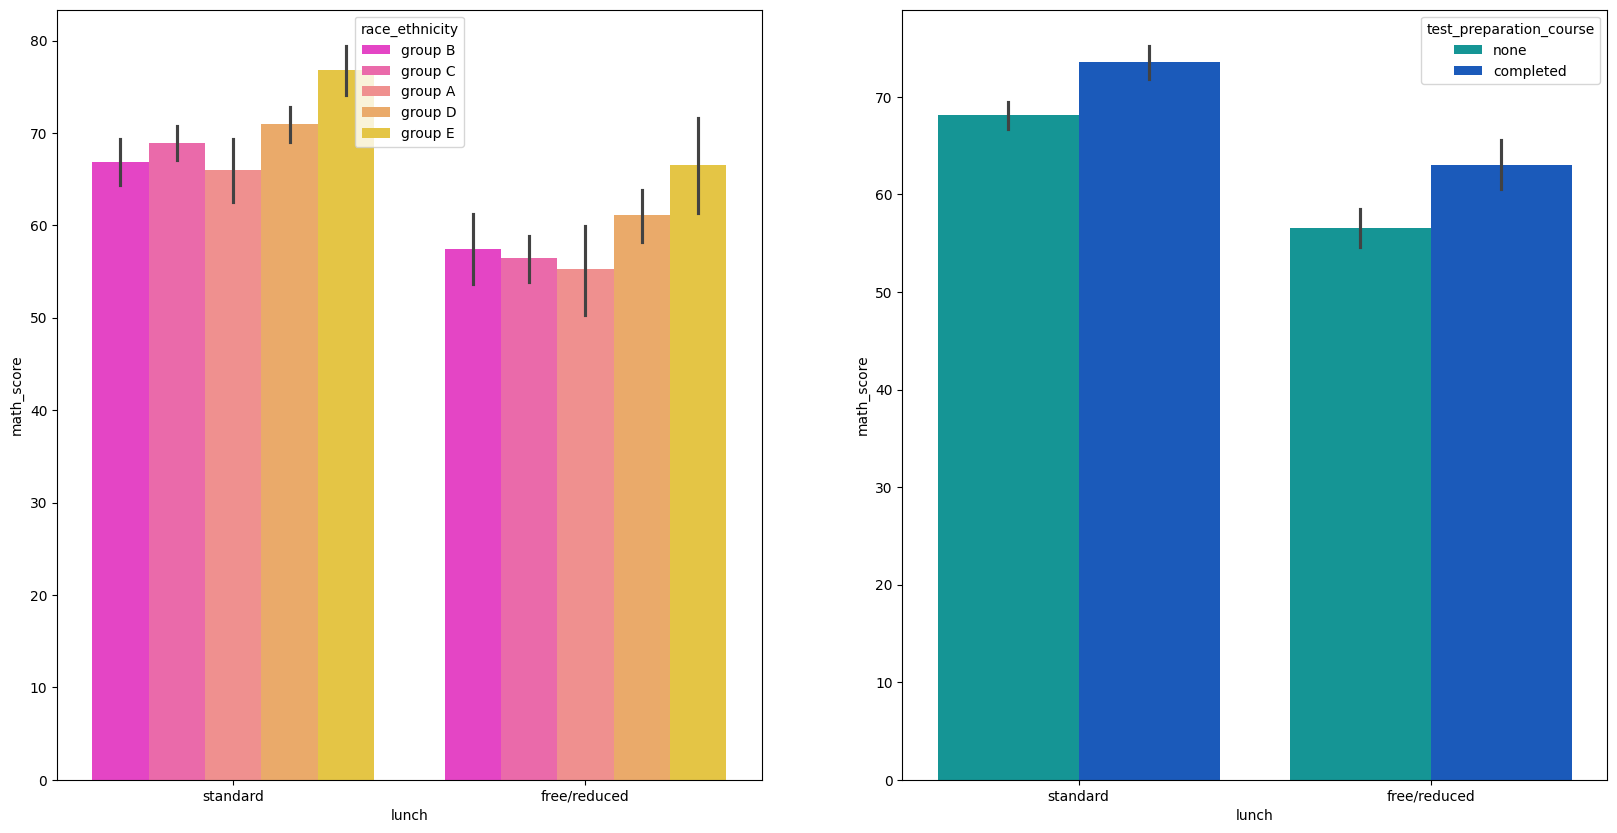

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

sns.barplot(x = df['lunch'], y = df['math_score'], hue = df['race_ethnicity'], ax = axes[0], palette = 'spring')
# for containers in axes[0].containers:
#     axes[0].bar_label(container)
    
sns.barplot(x = df['lunch'], y = df['math_score'], hue = df['test_preparation_course'], ax = axes[1], palette = 'winter_r')
# for containers in axes[1].containers:
#     axes[1].bar_label(container)

Checking Outliers

<Axes: ylabel='Average'>

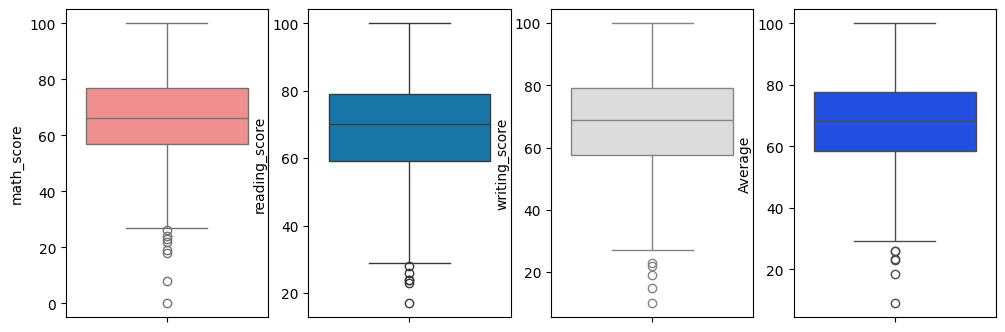

In [ ]:

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 4))

sns.boxplot(y = df['math_score'], palette = 'spring', ax = axes[0])
sns.boxplot(y = df['reading_score'], palette = 'winter_r', ax = axes[1])
sns.boxplot(y = df['writing_score'], palette = 'coolwarm', ax = axes[2])
sns.boxplot(y = df['Average'], palette = 'bright', ax = axes[3])

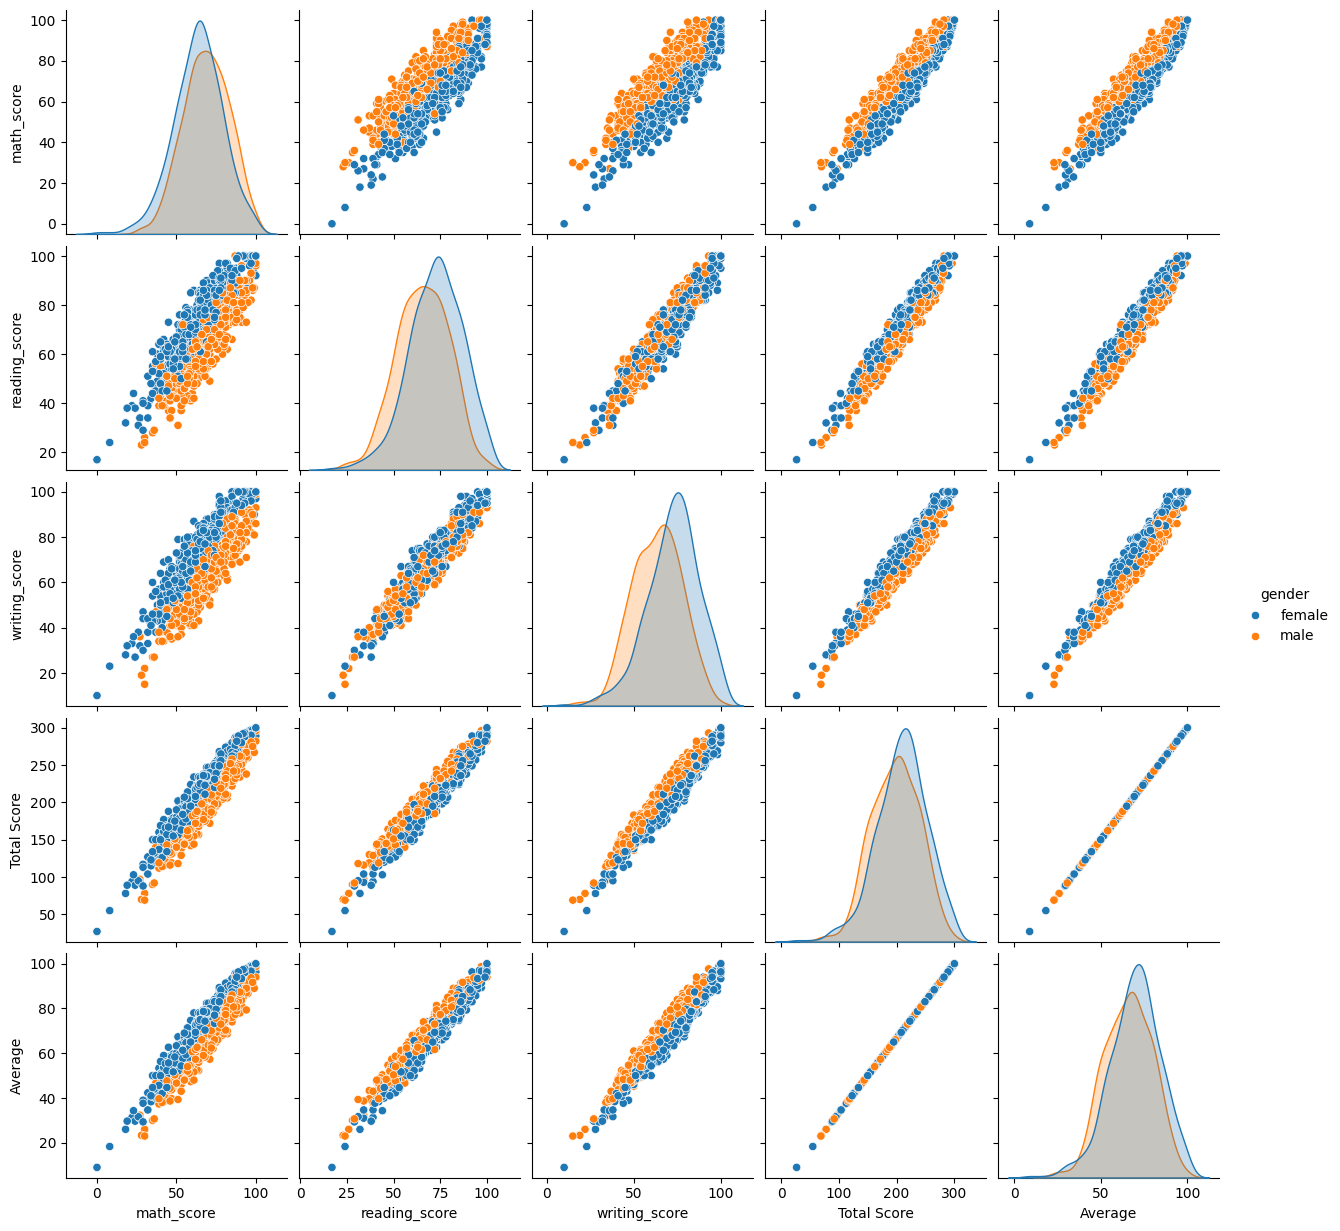

In [ ]:
sns.pairplot(data = df, hue = 'gender')
plt.show()